In [8]:
from matplotlib import pyplot as plt
import mne
import numpy as np
import os 

# Install mne  
https://mne.tools/stable/install/manual_install.html#manual-install 

Reading /Users/Aiden/Desktop/UNIBE_DATA/Advanced python/group_3_eeg/data/PHY_ID0000-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =       0.00 ...   29990.00 ms
        0 CTF compensation matrices available
Not setting metadata
841 matching events found
No baseline correction applied
0 projection items activated
(841, 7, 3000)
(7, 3000)
(3000,)
[0 0 0 0 0 0 0 0 0 0]
841
Stage for epoch 25: 0


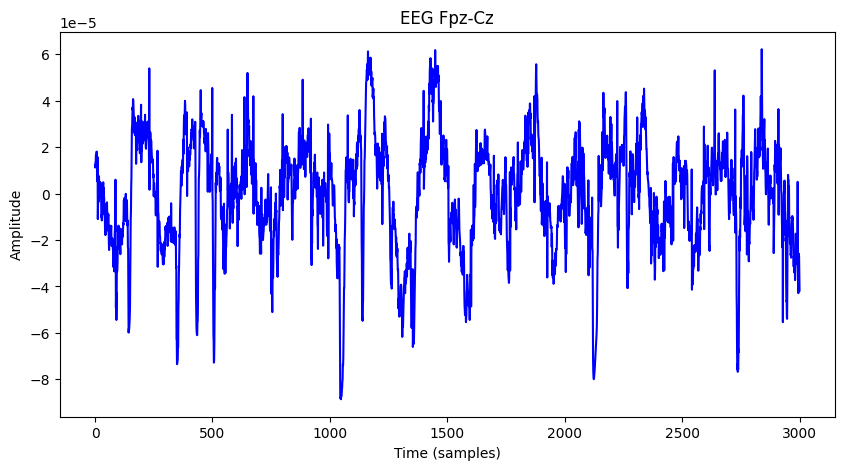

In [71]:
# PSG
epo = mne.read_epochs('data/PHY_ID0000-epo.fif', preload=True)
data = epo.get_data(copy=True)


print(data.shape) # (n_epochs, n_channels, n_times)
print(data[0].shape) # (n_channels, n_times)
print(data[0][0].shape) # (n_times,)

print(epo.events[:10, 2]) # first 10 sleep stage labels
print(len(epo.events[:, 2])) # number of events
# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(data[25][0], label='EEG Fpz-Cz', color='blue')
ax.set_title('EEG Fpz-Cz')
ax.set_xlabel('Time (samples)')
ax.set_ylabel('Amplitude')

# get the sleep stage 
labels = epo.events[:, 2]
print(f'Stage for epoch 25: {labels[25]}')


In [36]:
# get the channel names 
epo.ch_names
epo.events

array([[2883000,       0,       0],
       [2886000,       0,       0],
       [2889000,       0,       0],
       ...,
       [5397000,       0,       0],
       [5400000,       0,       0],
       [5403000,       0,       0]], shape=(841, 3), dtype=int32)

all code above was provided in the data.

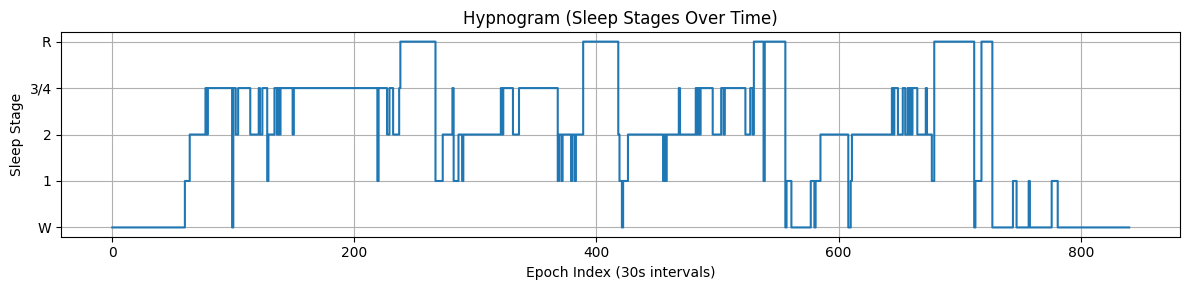

(841, 7, 3000)


In [ ]:
#There are 4 sleep stages in oiur data: W,1,2,3/4, R. I assume, W means awake and R means REM. For each epoch, there is 1 sleep stage value.
# An epoch is 30s long according to google (I think thats standard for eegs)
#

# get the sleep stage 
stage = epo.events[:, 2]
#Un comment the following line to see relationship between integer and sleep stage
#print(epo.event_id.items())

#These lines just swap the integer with the string of the sleep stage, 
#reverse_labels = {v: k for k,v in epo.event_id.items()}
#label_names = [reverse_labels[l] for l in stage]
#print(label_names)


stage_labels = ['W', '1', '2', '3/4', 'R']
labels_named = [stage_labels[int(l)] if l >= 0 else 'Unknown' for l in stage]


#This plots the sleep stage for each epoch(30s)
plt.figure(figsize=(12, 3))
plt.plot( labels, drawstyle='steps-post')
plt.yticks(ticks=[0, 1, 2, 3, 4], labels=stage_labels)
plt.xlabel('Epoch Index (30s intervals)')
plt.ylabel('Sleep Stage')
plt.title('Hypnogram (Sleep Stages Over Time)')
plt.grid(True)
plt.tight_layout()
plt.show()

#I guess the next step would be to run a for loop and do this for every file? Im confused because the github says we have data from 25 patients,
#  but we have 75 fif files

In [ ]:
#Normalizing the data. Not quite sure why we need to do this yet but. Like i said aove, just need to do a for loop like above and do it for each sample


mean = data.mean(axis=2, keepdims=True)
std =data.std(axis=2, keepdims=True)
normalized = (data - mean) / std
print(normalized.shape)

#For loop will look something like this:

"""
data_dir = 'data'
patient_files = [f for f in os.listdir(data_dir) if f.endswith('-epo.fif')]

all_normalized_data = []

for i, fname in enumerate(sorted(patient_files)):
    path = os.path.join(data_dir, fname)

    epo = mne.read_epochs(path, preload=True)
    data = epo.get_data(copy=True)

    mean = data.mean(axis=2, keepdims=True)
    std =data.std(axis=2, keepdims=True)
    normalized = (data - mean) / std

    all_normalized_data.append(normalized)

"""
    

(841, 7, 3000)
posix.uname_result(sysname='Darwin', nodename='claudias-macbook-pro.home', release='24.3.0', version='Darwin Kernel Version 24.3.0: Thu Jan  2 20:22:00 PST 2025; root:xnu-11215.81.4~3/RELEASE_X86_64', machine='x86_64')
